In [1]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d mkoklu42/rice-msc-dataset

 95% 97.0M/102M [00:04<00:00, 28.5MB/s]
100% 102M/102M [00:04<00:00, 24.9MB/s] 


In [3]:
!unzip *.zip && rm -rf *.zip

Archive:  rice-msc-dataset.zip
  inflating: Rice_MSC_Dataset.arff   
  inflating: Rice_MSC_Dataset/Rice_MSC_Dataset/Rice_Citation_Request.txt  
  inflating: Rice_MSC_Dataset/Rice_MSC_Dataset/Rice_MSC_Dataset.xlsx  


In [4]:
!pip install openpyxl

#EDA

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

plt.style.use("fivethirtyeight")

In [2]:
warnings.simplefilter("ignore")

In [3]:
df = pd.read_excel("/content/Rice_MSC_Dataset/Rice_MSC_Dataset/Rice_MSC_Dataset.xlsx")

In [4]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ,CLASS
0,7805,437.915,209.8215,48.0221,0.9735,99.6877,0.9775,7985,0.3547,4.3693,...,113.9924,65.0610,59.5989,104.8552,67.8779,63.0828,0.3673,0.3793,0.4733,Basmati
1,7503,340.757,138.3361,69.8417,0.8632,97.7400,0.9660,7767,0.6637,1.9807,...,105.7055,64.3685,62.2084,96.8375,65.5371,63.5832,0.3014,0.3144,0.3641,Arborio
2,5124,314.617,141.9803,46.5784,0.9447,80.7718,0.9721,5271,0.4760,3.0482,...,109.7155,62.6423,58.7439,100.2352,68.9753,59.8342,0.3233,0.3445,0.4448,Jasmine
3,7990,437.085,201.4386,51.2245,0.9671,100.8622,0.9659,8272,0.6274,3.9325,...,116.5405,64.9069,60.2562,107.2560,67.3298,63.2237,0.3880,0.4020,0.4904,Basmati
4,7433,342.893,140.3350,68.3927,0.8732,97.2830,0.9831,7561,0.6006,2.0519,...,107.7502,64.7071,61.3549,98.8704,66.2048,63.5378,0.3184,0.3303,0.3928,Arborio


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Columns: 107 entries, AREA to CLASS
dtypes: float64(95), int64(11), object(1)
memory usage: 61.2+ MB


In [6]:
label = df["CLASS"].value_counts().index 
value = df["CLASS"].value_counts().values

In [7]:
label

Index(['Basmati', 'Arborio', 'Jasmine', 'Ipsala', 'Karacadag'], dtype='object')

In [9]:
import plotly.express as px

In [30]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

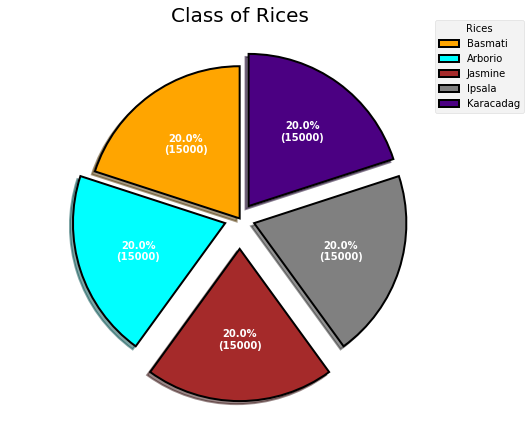

In [45]:
explode = (0.0, 0.1, 0.2, 0.1, 0.1)
colors = ( "orange", "cyan", "brown","grey", "indigo")
wp = { 'linewidth' : 2, 'edgecolor' : "black" }


fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(value,
                                  autopct = lambda pct: func(pct, value),
                                  explode = explode,
                                  labels = label,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="w",fontsize=16))

ax.legend(wedges, label,
          title ="Rices",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.8, 1.8))
plt.setp(autotexts, size = 10, weight ="bold")
ax.set_title("Class of Rices",fontsize=20)
plt.show()

In [52]:
df.columns[:20]

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'meanRR', 'meanRG', 'meanRB',
       'StdDevRR'],
      dtype='object')

In [54]:
df.iloc[:, :12]

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS
0,7805,437.915,209.8215,48.0221,0.9735,99.6877,0.9775,7985,0.3547,4.3693,0.5114,0.4751
1,7503,340.757,138.3361,69.8417,0.8632,97.7400,0.9660,7767,0.6637,1.9807,0.8120,0.7065
2,5124,314.617,141.9803,46.5784,0.9447,80.7718,0.9721,5271,0.4760,3.0482,0.6505,0.5689
3,7990,437.085,201.4386,51.2245,0.9671,100.8622,0.9659,8272,0.6274,3.9325,0.5256,0.5007
4,7433,342.893,140.3350,68.3927,0.8732,97.2830,0.9831,7561,0.6006,2.0519,0.7944,0.6932
...,...,...,...,...,...,...,...,...,...,...,...,...
74995,5551,285.911,114.1695,62.9079,0.8345,84.0699,0.9846,5638,0.6418,1.8149,0.8533,0.7364
74996,7696,322.703,121.3900,81.1375,0.7438,98.9892,0.9868,7799,0.7309,1.4961,0.9287,0.8155
74997,7579,339.295,136.3125,71.2866,0.8524,98.2338,0.9805,7730,0.6399,1.9122,0.8273,0.7207
74998,15174,489.502,200.9486,97.6282,0.8740,138.9969,0.9766,15537,0.7903,2.0583,0.7958,0.6917


In [55]:
corr = df.iloc[:, :12].corr()

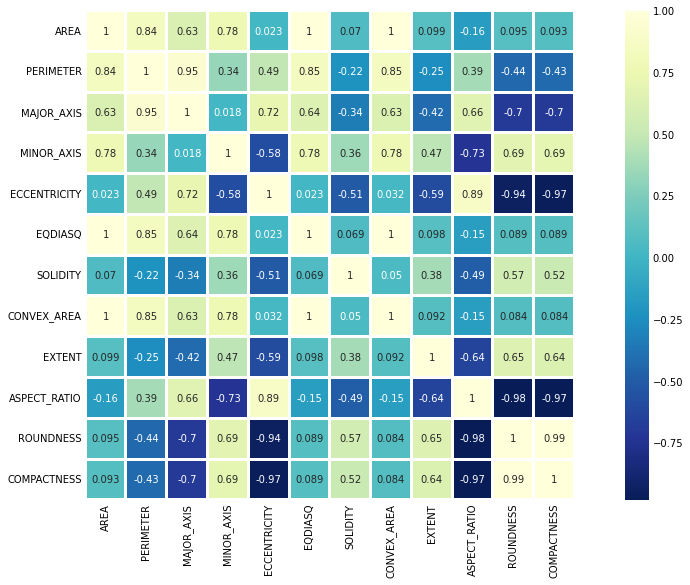

In [60]:
plt.figure(figsize=(16, 9))

sns.heatmap(corr, annot=True, square=True, cmap="YlGnBu_r", linewidth=2)

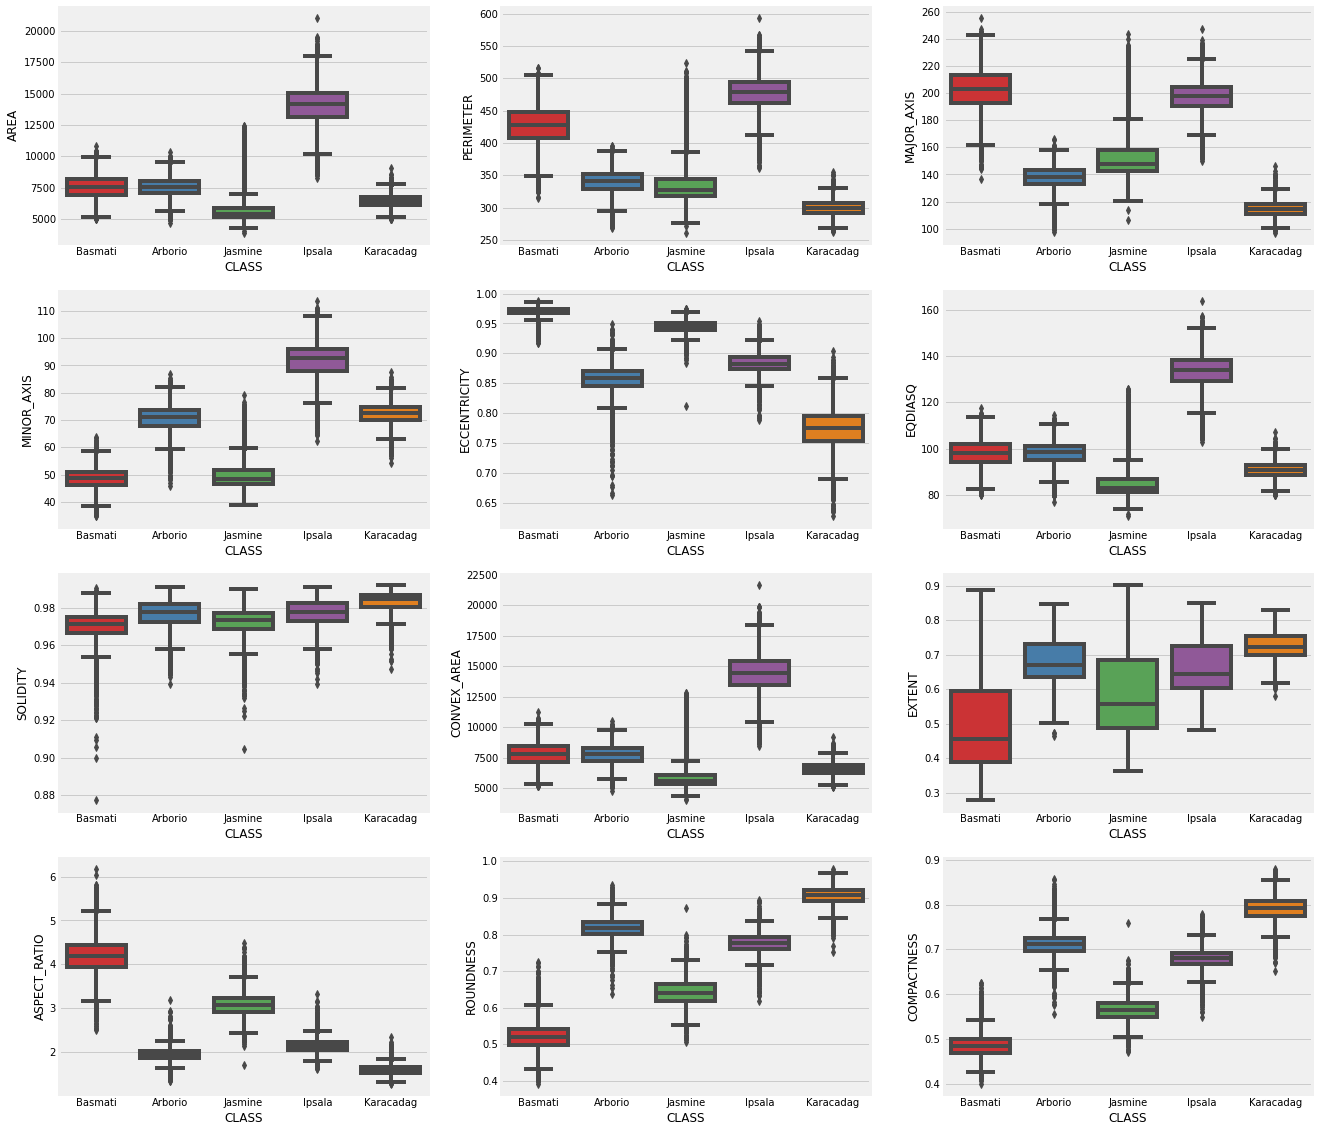

In [62]:
plt.figure(figsize=(20, 20))

for i in range(12):
  plt.subplot(4, 3, i + 1)
  sns.boxplot(x="CLASS", y=df.columns[i], data=df, palette="Set1")
plt.show()

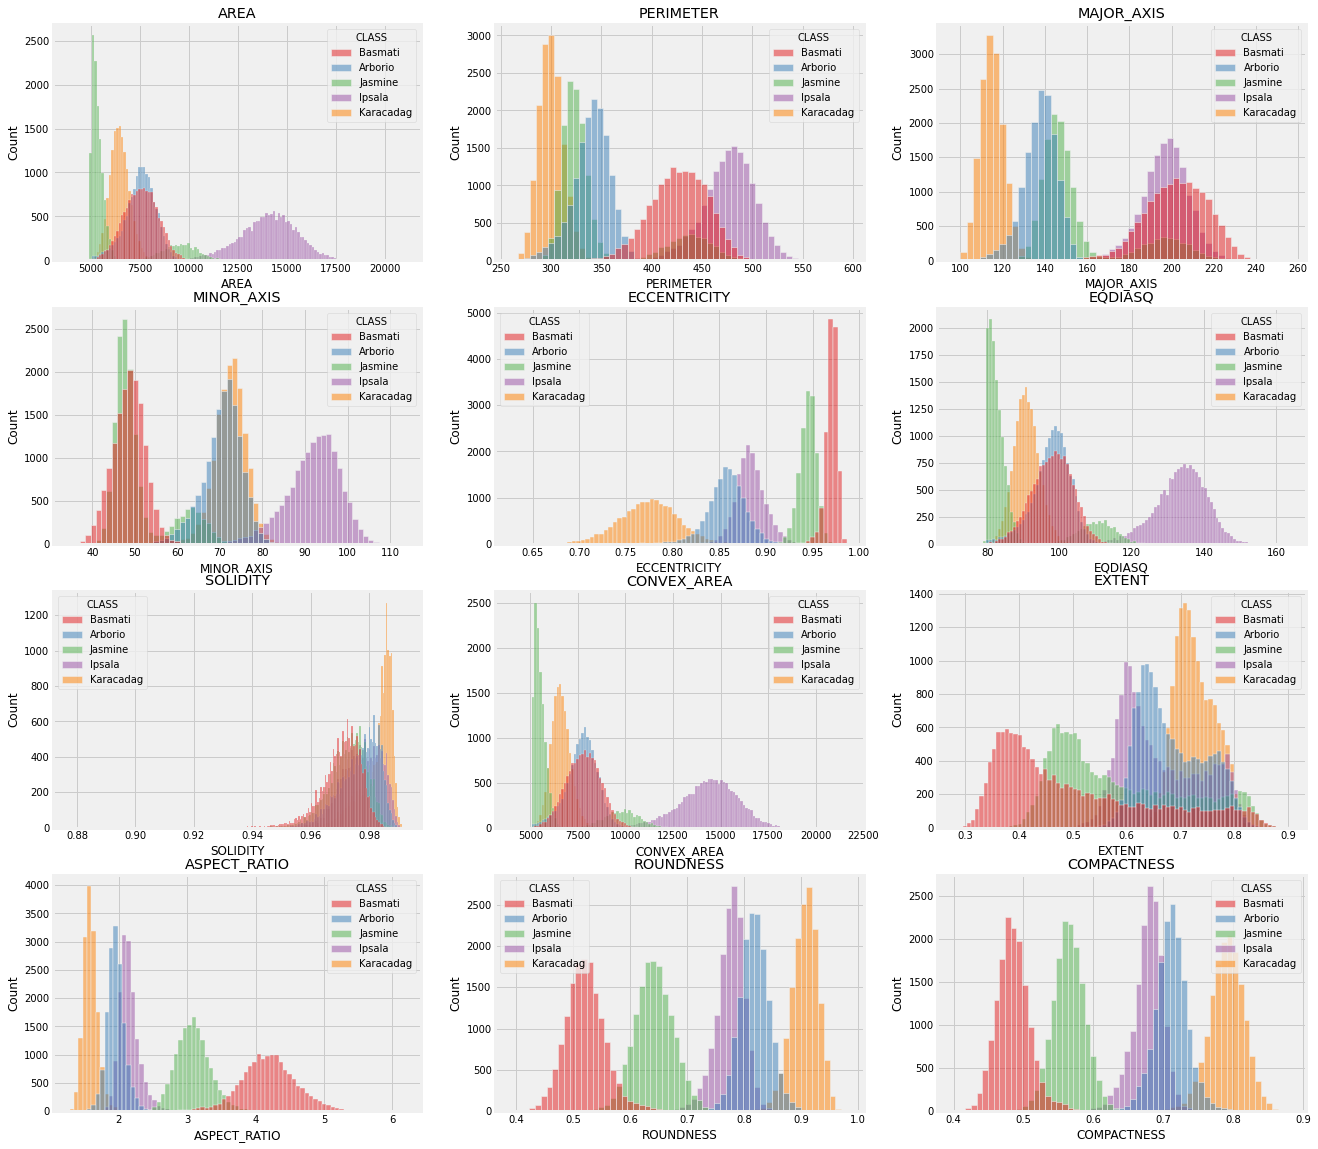

In [65]:
plt.figure(figsize=(20, 20))

for i in range(12):
  plt.subplot(4, 3, i + 1)
  sns.histplot(data=df, x=df.columns[i], palette="Set1", hue="CLASS")
  plt.title(df.columns[i])
plt.show()

# Feature Engineering

In [66]:
df.isnull().sum()

AREA            0
PERIMETER       0
MAJOR_AXIS      0
MINOR_AXIS      0
ECCENTRICITY    0
               ..
ALLdaub4Cr      0
ALLdaub4XX      0
ALLdaub4YY      0
ALLdaub4ZZ      0
CLASS           0
Length: 107, dtype: int64

In [150]:
len(df)

75000

In [151]:
df = df.dropna()
len(df)

74992

In [152]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [153]:
x.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4V,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ
0,7805,437.915,209.8215,48.0221,0.9735,99.6877,0.9775,7985,0.3547,4.3693,...,0.4733,113.9924,65.0610,59.5989,104.8552,67.8779,63.0828,0.3673,0.3793,0.4733
1,7503,340.757,138.3361,69.8417,0.8632,97.7400,0.9660,7767,0.6637,1.9807,...,0.4182,105.7055,64.3685,62.2084,96.8375,65.5371,63.5832,0.3014,0.3144,0.3641
2,5124,314.617,141.9803,46.5784,0.9447,80.7718,0.9721,5271,0.4760,3.0482,...,0.4606,109.7155,62.6423,58.7439,100.2352,68.9753,59.8342,0.3233,0.3445,0.4448
3,7990,437.085,201.4386,51.2245,0.9671,100.8622,0.9659,8272,0.6274,3.9325,...,0.4797,116.5405,64.9069,60.2562,107.2560,67.3298,63.2237,0.3880,0.4020,0.4904
4,7433,342.893,140.3350,68.3927,0.8732,97.2830,0.9831,7561,0.6006,2.0519,...,0.4332,107.7502,64.7071,61.3549,98.8704,66.2048,63.5378,0.3184,0.3303,0.3928


In [76]:
y.head()

0    Basmati
1    Arborio
2    Jasmine
3    Basmati
4    Arborio
Name: CLASS, dtype: object

In [154]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [155]:
x, y = shuffle(x, y)
x, y = x.values, y.values

In [156]:
scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)

encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
labels = to_categorical(y).astype(int)

In [157]:
x_train, x_test, y_train, y_test = train_test_split(X, labels, random_state=42, test_size=0.3)

In [138]:
print("X Train shape: ", x_train.shape)
print("X Test shape: ", x_test.shape)

X Train shape:  (52500, 106)
X Test shape:  (22500, 106)


#Model

In [158]:
import tensorflow as tf

In [159]:
# Conv Layers

inp = tf.keras.layers.Input(shape=(x_train.shape[1],1))
u1 = tf.keras.layers.Conv1D(filters=32, kernel_size=(3), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001))(inp)
u2 = tf.keras.layers.MaxPooling1D(pool_size=(2))(u1)
u3 = tf.keras.layers.Dropout(rate=0.2)(u2)
u4 = tf.keras.layers.Conv1D(filters=64, kernel_size=(3), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001))(u3)
u5 = tf.keras.layers.MaxPooling1D(pool_size=(2))(u4)
u6 = tf.keras.layers.Dropout(rate=0.2)(u5)
u7 = tf.keras.layers.Conv1D(filters=64, kernel_size=(3), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001))(u6)
u8 = tf.keras.layers.MaxPooling1D(pool_size=(2))(u7)
u9 = tf.keras.layers.Dropout(rate=0.2)(u8)

f = tf.keras.layers.Flatten()(u9)
l1 = tf.keras.layers.Dense(units=512)(f)
l2 = tf.keras.layers.LeakyReLU(alpha=0.001)(l1)
l3 = tf.keras.layers.BatchNormalization()(l2)
l4 = tf.keras.layers.Dense(units=256)(l3)
l5 = tf.keras.layers.LeakyReLU(alpha=0.001)(l4)
l6 = tf.keras.layers.BatchNormalization()(l5)
l7 = tf.keras.layers.Dense(units=128)(l6)
l8 = tf.keras.layers.LeakyReLU(alpha=0.001)(l7)
l9 = tf.keras.layers.BatchNormalization()(l8)
l10 = tf.keras.layers.Dense(units=5)(l9)
outputs = tf.keras.layers.Activation("softmax")(l10)

model = tf.keras.models.Model(inputs = [inp], outputs = [outputs])

In [160]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 106, 1)]          0         
                                                                 
 conv1d_12 (Conv1D)          (None, 106, 32)           128       
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 53, 32)           0         
 g1D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 53, 32)            0         
                                                                 
 conv1d_13 (Conv1D)          (None, 53, 64)            6208      
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 26, 64)           0         
 g1D)                                                      

In [161]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [118]:
earlyStopping = tf.keras.callbacks.EarlyStopping(patience=10,mode='max',monitor='val_loss',restore_best_weights=True)
reduceLR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',min_lr=0.0001)
modelCheck = tf.keras.callbacks.ModelCheckpoint(filepath='model.h5',monitor='val_loss',save_best_only=True)
callbacks=[earlyStopping,reduceLR,modelCheck]

In [162]:
BATCH = 256
EPOCHS = 30

In [163]:
history = model.fit(
  x_train, y_train,
  validation_data=(x_test ,y_test),
  epochs=EPOCHS,
  batch_size=BATCH
  # callbacks=callbacks
)

Epoch 1/30
206/206 [==============================] - 5s 18ms/step - loss: 0.0680 - accuracy: 0.9771 - val_loss: 0.0332 - val_accuracy: 0.9952
Epoch 2/30
206/206 [==============================] - 3s 14ms/step - loss: 0.0187 - accuracy: 0.9940 - val_loss: 0.0055 - val_accuracy: 0.9984
Epoch 3/30
206/206 [==============================] - 3s 14ms/step - loss: 0.0131 - accuracy: 0.9960 - val_loss: 0.0075 - val_accuracy: 0.9978
Epoch 4/30
206/206 [==============================] - 3s 14ms/step - loss: 0.0125 - accuracy: 0.9962 - val_loss: 0.0051 - val_accuracy: 0.9989
Epoch 5/30
206/206 [==============================] - 3s 17ms/step - loss: 0.0104 - accuracy: 0.9966 - val_loss: 0.0047 - val_accuracy: 0.9989
Epoch 6/30
206/206 [==============================] - 4s 21ms/step - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.0042 - val_accuracy: 0.9991
Epoch 7/30
206/206 [==============================] - 5s 23ms/step - loss: 0.0068 - accuracy: 0.9978 - val_loss: 0.0046 - val_accuracy: 0.9988

#Evaluation

In [164]:
loss, accuracy = model.evaluate(x_test, y_test)

704/704 [==============================] - 5s 7ms/step - loss: 0.0040 - accuracy: 0.9992


Text(0, 0.5, 'Accuracy')

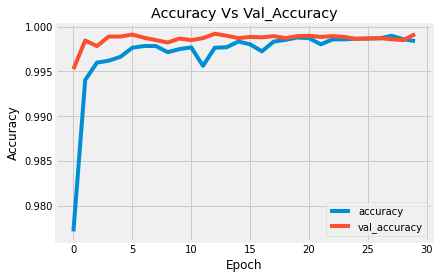

In [165]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])
plt.title('Accuracy Vs Val_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

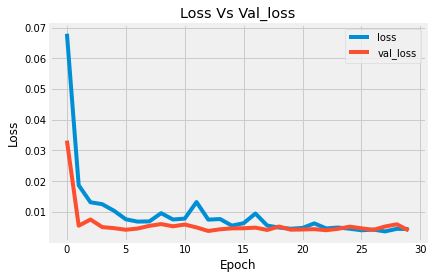

In [166]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.title('Loss Vs Val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

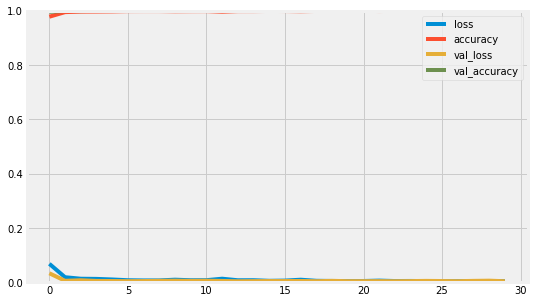

In [167]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [168]:
predictions = model.predict(x_test)

In [169]:
pred = np.argmax(predictions, axis=1)
# label
y_test = np.argmax(y_test, axis=1)

In [170]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4519
           1       1.00      1.00      1.00      4545
           2       1.00      1.00      1.00      4526
           3       1.00      1.00      1.00      4412
           4       1.00      1.00      1.00      4496

    accuracy                           1.00     22498
   macro avg       1.00      1.00      1.00     22498
weighted avg       1.00      1.00      1.00     22498



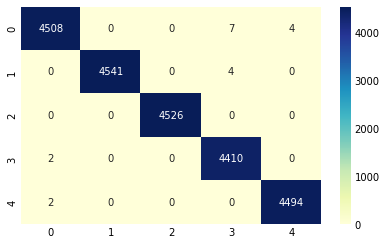

In [173]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

sns.heatmap(cm,  annot=True, fmt="d", cmap="YlGnBu")

Implemented By Muhammad Hanan Asghar